In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance
import pylab
import random
from monte_funcs import *
from IPython.display import clear_output
import datetime

In [37]:
vx = pd.read_csv('vixts.csv')

In [68]:

def sim_and_test(starting_amt, tkrs, rolling_lookback, n_paths, n_days_project):
    dfs = {}
    for tkr in tkrs:#,'SPY', 'AAPL', 'FB', 'AMZN', 'BA', 'GM']:
        pnls = {}
        dta = historical_test(ticker = tkr, rolling_lookback = rolling_lookback, n_paths = n_paths, n_days_project  = n_days_project)
        pnl = [starting_amt]
        pnl_tkr = [starting_amt]
        for i in range(len(dta)-1):
            print(str(int(i)/(len(dta)-1)*100) + f'% done backtesting {tkr}')
            clear_output(wait = True)
            pnl_tkr.append(pnl_tkr[-1] * (1+dta.iloc[i+1]['Pct_Change']))
            if dta.iloc[i]['Close'] < dta.iloc[i]['E']:
                pnl.append(pnl[-1]*(1+dta.iloc[i+1]['Pct_Change']))
            else:
                pnl.append(pnl[-1])
        pnls[f'{rolling_lookback}_{n_paths}_{n_days_project}_{tkr}'] = pnl 
        pnls[f'Long_{tkr}'] = pnl_tkr

        df = pd.DataFrame(pnls)
        df['Strat_Ret'] = df[f'{rolling_lookback}_{n_paths}_{n_days_project}_{tkr}'] - df[f'{rolling_lookback}_{n_paths}_{n_days_project}_{tkr}'].shift(1)
        df = df.set_index(yfinance.download(f'{tkr}').index[:(-n_days_project -rolling_lookback)])
        dfs[f'{tkr}'] = df
        #dfs.append(df)
    length = len(tkrs)
    keys = list(dfs.keys())
    if length > 1:
        fig, axs = plt.subplots(length, squeeze=False)
        for i in range(length):
            for col in dfs[keys[i]]:
                axs[i].plot(dfs[keys[i]][col], label = f'{col}')
            axs[i].xlabel('Date')
            axs[i].ylabel('Portfolio Value')
            axs[i].title(f'{tkr}_lookback={rolling_lookback}_n_paths={n_paths}_n_days_project={n_days_project}_backtest')
            
            axs.legend()
    else:
        for col in dfs[keys[0]]:
            plt.plot(dfs[keys[0]][col], label = f'{col}')
        plt.xlabel('Date')
        plt.ylabel('Portfolio Value')
        plt.title(f'{tkr}_lookback={rolling_lookback}_n_paths={n_paths}_n_days_project={n_days_project}_backtest')
        
        plt.legend()
        
    for tkr in tkrs:
        mean_strat = np.mean(dfs[f'{tkr}'][f'{rolling_lookback}_{n_paths}_{n_days_project}_{tkr}'])
        sd_strat = np.std(dfs[f'{tkr}'][f'{rolling_lookback}_{n_paths}_{n_days_project}_{tkr}'])
        sharpe_strat = mean_strat/sd_strat
        
        mean_control = np.mean(dfs[f'{tkr}'][f'Long_{tkr}'])
        sd_control = np.std(dfs[f'{tkr}'][f'Long_{tkr}'])
        sharpe_control = mean_control/sd_control
        
        print(f'Strat Sharpe ({rolling_lookback}_{n_paths}_{n_days_project}_{tkr}): {sharpe_strat}, Buy and Hold Sharpe: {sharpe_control}')
              
    return dfs

[*********************100%***********************]  1 of 1 completed
Strat Sharpe (20_50_2_SPY): 5.049953820209191, Buy and Hold Sharpe: 1.8945112986211659


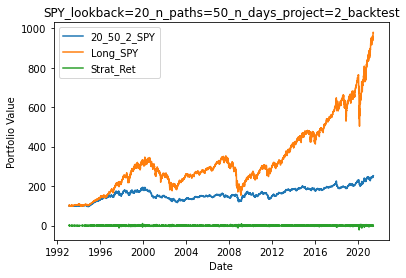

In [69]:
df = sim_and_test(100, ['SPY'], 20, 50, 2)

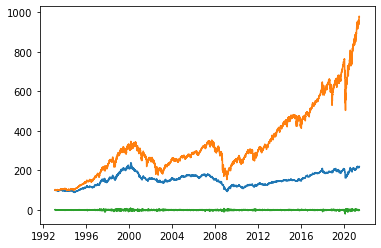

In [48]:
plt.plot(df['SPY'])

In [43]:
#vx['Date'] = [datetime.datetime.strptime(str(i) ,'%Y%m%d') for i in vx['Date']]
vx[vx['Date'].between()]

,Date,VIX_1^2,VIX_2^2,VIX_3^2,VIX_6^2,VIX_9^2,VIX_12^2
0,1996-01-04,0.01771,0.01681,0.01668,0.01785,0.01891,0.02027
1,1996-01-05,0.01708,0.01674,0.01661,0.01828,0.02034,0.01993
2,1996-01-08,0.01610,0.01589,0.01582,0.01739,0.01863,0.01955
3,1996-01-09,0.02406,0.01904,0.01675,0.01858,0.01955,0.02088
4,1996-01-10,0.02494,0.02151,0.02006,0.01978,0.02079,0.02184
...,...,...,...,...,...,...,...
5907,2019-06-24,0.02402,0.02642,0.02783,0.03070,0.03137,0.03290
5908,2019-06-25,0.02718,0.02870,0.02980,0.03222,0.03277,0.03402
5909,2019-06-26,0.02705,0.02812,0.02945,0.03219,0.03296,0.03384
5910,2019-06-27,0.02626,0.02715,0.02836,0.03063,0.03191,0.03293


NameError: name 'lt' is not defined

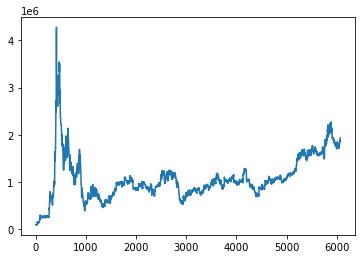

In [20]:
plt.plot(pnls['5_50_2_AMZN'], label = 'Strat')
plt.plot(pnls['Long_AMZN'], label = 'Long AMZN')
plt.legend()

In [89]:
yfinance.download('QQQ')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-03-10,51.125000,51.156250,50.281250,51.062500,44.335434,5232000
1999-03-11,51.437500,51.734375,50.312500,51.312500,44.552479,9688600
1999-03-12,51.125000,51.156250,49.656250,50.062500,43.467171,8743600
1999-03-15,50.437500,51.562500,49.906250,51.500000,44.715282,6369000
1999-03-16,51.718750,52.156250,51.156250,51.937500,45.095146,4905800
...,...,...,...,...,...,...
2021-06-30,354.829987,355.230011,353.829987,354.429993,354.429993,32724000
2021-07-01,354.070007,355.089996,352.679993,354.570007,354.570007,29290000
2021-07-02,356.519989,358.970001,356.279999,358.640015,358.640015,32715600


In [48]:
qqq_df = pd.DataFrame(pnls)
qqq_df['Strat_Ret'] = qqq_df['5_50_5_QQQ'] - qqq_df['5_50_5_QQQ'].shift(1)

In [95]:
def sharpe(ret, sd):
    return (ret)/sd

In [82]:
total_ret = (qqq_df.iloc[-1]['5_50_5_QQQ'] - qqq_df.iloc[0]['5_50_5_QQQ'])/qqq_df.iloc[0]['5_50_5_QQQ']
qqq_df['pct_return'] = qqq_df.pct_change()['5_50_5_QQQ']

In [123]:
np.mean(qqq_df['pct_return'])/np.std(qqq_df['pct_return'])

0.015066674901956319

In [126]:
np.mean(qqq_df['5_50_5_QQQ'])/np.std(qqq_df['5_50_5_QQQ'])

2.653920976388654

In [127]:
np.mean(qqq_df['Long_QQQ'])/np.std(qqq_df['Long_QQQ'])

1.2832410364373743

In [128]:
qqq_df

,5_50_5_QQQ,Long_QQQ,Strat_Ret,pct_return,rf,excess_ret
0,100000.000000,100000.000000,NaN,NaN,0.000198,NaN
1,101939.393939,101939.393939,1939.393939,0.019394,0.000198,0.019196
2,99333.333333,99333.333333,-2606.060606,-0.025565,0.000198,-0.025763
3,98121.212121,98121.212121,-1212.121212,-0.012203,0.000198,-0.012401
4,98121.212121,94666.666667,0.000000,0.000000,0.000198,-0.000198
...,...,...,...,...,...,...
5604,177801.904288,674404.829545,86.913458,0.000489,0.000198,0.000291
5605,178901.226902,678574.573864,1099.322614,0.006183,0.000198,0.005984
5606,178681.353017,677740.589489,-219.873885,-0.001229,0.000198,-0.001427
5607,180854.407927,685983.013731,2173.054910,0.012162,0.000198,0.011963


Sharpe(2_2):0    3.907207
dtype: float64
Sharpe(2_3):0    3.740305
dtype: float64
Sharpe(2_4):0    6.70835
dtype: float64
Sharpe(3_2):0    5.006585
dtype: float64
Sharpe(3_3):0    4.443148
dtype: float64
Sharpe(3_4):0    3.819295
dtype: float64
Sharpe(4_4):0    7.36637
dtype: float64
Sharpe(Long Spy):0    1.90033
dtype: float64


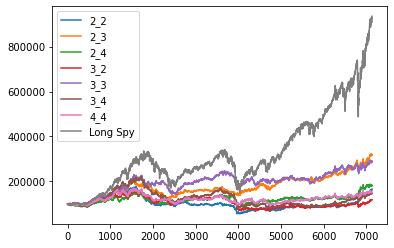

In [201]:
for key in pnls.keys():
    plt.plot(pnls[key], label = key)
    print(f'Sharpe({key}):{np.mean(pd.DataFrame(pnls[key])/np.std(pd.DataFrame(pnls[key])))}')
plt.legend()

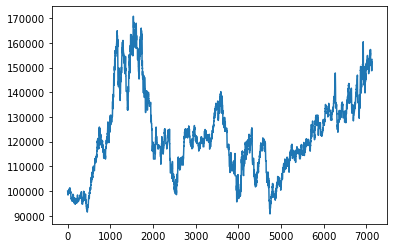

In [203]:
plt.plot(pnls['4_4'])

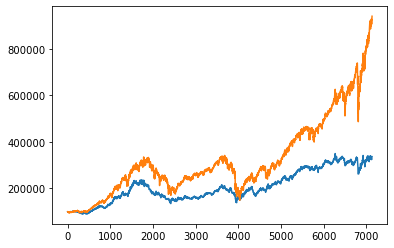

In [186]:
pnl = [100000]
errors = []
pnl_spy = [100000]

for i in range(len(dta)-1):
    pnl_spy.append(pnl_spy[-1] * (1+dta.iloc[i+1]['Pct_Change']))
    if dta.iloc[i]['Close'] < dta.iloc[i]['E']:
        pnl.append(pnl[-1]*(1+dta.iloc[i+1]['Pct_Change']))
    else:
        pnl.append(pnl[-1])
        #pnl.append(pnl[i]*(1+(-1*dta.iloc[i]['Pct_Change'])))
    errors.append(dta.iloc[i]['Actual'] - dta.iloc[i]['E'])
plt.plot(pnl)
plt.plot(pnl_spy)

In [185]:
print(np.mean(pnl)/np.std(pnl), np.mean(pnl_spy)/np.std(pnl_spy))

2.9992918571698945 1.8981687459753682


In [176]:
df = pd.DataFrame()
df['PNL']= pnl
df['PNL_Pct_Change'] = df.pct_change()
df['PNL_Change'] = df['PNL'] - df['PNL'].shift(1)
df
#plt.hist(df['PNL_Change'], bins = 1000)
#plt.hist(df['PNL'], bins = 1000)
df
#np.mean(df['PNL'])/np.std(df['PNL'])

,PNL,PNL_Pct_Change,PNL_Change
0,100.000000,NaN,NaN
1,100.205620,0.002056,0.205620
2,99.174698,-0.010288,-1.030922
3,99.655795,0.004851,0.481097
4,99.655795,0.000000,0.000000
...,...,...,...
4318,334.039206,0.003552,1.182326
4319,334.712606,0.002016,0.673400
4320,334.892706,0.000538,0.180101
4321,335.174578,0.000842,0.281872


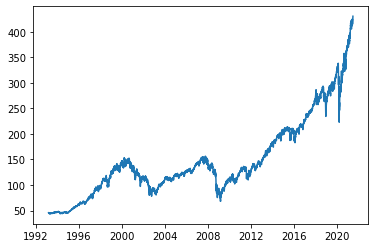

In [139]:
plt.plot(dta['Close'])


In [28]:
#simulated sp500
def pnl_walk(a, n, rates):
    # defining the number of steps
    
    # n must = lenrates

    #creating two array for containing x and y coordinate
    #of size equals to the number of size and filled up with 0's
    x = numpy.zeros(n)
    x[0] = a

    # filling the coordinates with random variables
    for i in range(1, n):
        rate = np.random.choice(rates)
        x[i] = x[i-1]*(1+rate)
    
    
    return x


In [45]:
def simulate_rndm_pnl(n_sims, starting_val, steps, generated):
    ends = []
    sers = []
    for i in range(n_sims):
        ser = pnl_walk(starting_val, steps, generated)
        sers.append(ser)
        ends.append(ser[-1])
        #plt.plot(ser)
    
    return sers, ends
    #plt.ticklabel_format(style = 'plain')
    #print(f'Mean Ending Value = {np.mean(ends)}, Sd = {np.std(ends)/n_sims}')

In [32]:
import pandas as pd
close_copy = close.copy()
cur = close_copy.iloc[-1]['log_return']
rolling_sd = close_copy.iloc[-1]['rolling_sd']
rolling_mean = close_copy.iloc[-1]['rolling_mean']
generated = np.random.normal(rolling_mean,rolling_sd,1000)
paths = simulate_rndm_pnl(1000, cur, 25,generated)
df = pd.DataFrame(paths).transpose()

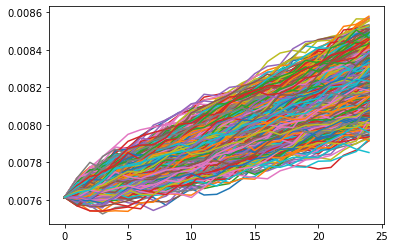

In [33]:
for col in df:
    plt.plot(df[col])

In [ ]:
data = 